In [ ]:
import urllib.request
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

drive.mount('/content/gdrive')

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

Mounted at /content/gdrive


**Przygotowanie danych**

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/data_widzenie')


def wyswietl(obraz):
  plt.imshow(obraz, cmap='gray')
  plt.axis('off')
  plt.show()

# data_iterator = data.as_numpy_iterator()
# batch = data_iterator.next()
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])

Found 323 files belonging to 2 classes.


In [ ]:
nrows = 4
ncols = 4
data_extend_lawki = []
for i in range (1, 21):
  image = img_to_array(load_img('/content/gdrive/MyDrive/dat/lawki/lawka' + str(i) + '.jpg'))
  image_ = np.expand_dims(image, axis=0)
  imgen = ImageDataGenerator(
    height_shift_range=0.2,
    zoom_range=[0.5,2],
    shear_range=50,
    vertical_flip=True
    )
  img_train = imgen.flow(image_, batch_size=1, save_to_dir='/content/gdrive/MyDrive/data_widzenie/lawki_wyg')
  for j in range(nrows):
    for k in range(ncols):
      image_batch = img_train.next()


data_extend_smietniki = []
for i in range (1, 11):
  image = img_to_array(load_img('/content/gdrive/MyDrive/dat/smietniki/smietnik' + str(i) + '.jpg'))
  image_ = np.expand_dims(image, axis=0)
  imgen = ImageDataGenerator(
    height_shift_range=0.2,
    zoom_range=[0.5,2],
    shear_range=50,
    vertical_flip=True
    )
  img_train = imgen.flow(image_, batch_size=1, save_to_dir='/content/gdrive/MyDrive/data_widzenie/smietniki_wyg')
  for j in range(nrows):
    for k in range(ncols):
      image_batch = img_train.next()
      data_extend_smietniki.append(image_batch)

In [ ]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.38431373, 0.42352942, 0.14901961],
          [0.38431373, 0.42352942, 0.14901961],
          [0.38431373, 0.42352942, 0.14901961],
          ...,
          [0.54420954, 0.540288  , 0.5246017 ],
          [0.5254902 , 0.52156866, 0.5058824 ],
          [0.5254902 , 0.52156866, 0.5058824 ]],
 
         [[0.38431373, 0.42352942, 0.14901961],
          [0.38431373, 0.42352942, 0.14901961],
          [0.38431373, 0.42352942, 0.14901961],
          ...,
          [0.54420954, 0.540288  , 0.5246017 ],
          [0.5254902 , 0.52156866, 0.5058824 ],
          [0.5254902 , 0.52156866, 0.5058824 ]],
 
         [[0.38431373, 0.42352942, 0.14901961],
          [0.38431373, 0.42352942, 0.14901961],
          [0.38431373, 0.42352942, 0.14901961],
          ...,
          [0.5371324 , 0.5332108 , 0.5175245 ],
          [0.518413  , 0.51449144, 0.49880514],
          [0.518413  , 0.51449144, 0.49880514]],
 
         ...,
 
         [[0.35176164, 0.33607537, 0.29803923],
          [0.35176

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

**Uczenie modelu**

In [ ]:

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

**Trenowanie**

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 16s 2s/step - loss: 0.9368 - accuracy: 0.5402 - val_loss: 0.6875 - val_accuracy: 0.5625
Epoch 2/20
7/7 [==============================] - 14s 2s/step - loss: 0.6892 - accuracy: 0.6027 - val_loss: 0.6790 - val_accuracy: 0.7500
Epoch 3/20
7/7 [==============================] - 14s 2s/step - loss: 0.6713 - accuracy: 0.7098 - val_loss: 0.6654 - val_accuracy: 0.6250
Epoch 4/20
7/7 [==============================] - 14s 2s/step - loss: 0.6569 - accuracy: 0.6518 - val_loss: 0.6286 - val_accuracy: 0.8438
Epoch 5/20
7/7 [==============================] - 14s 2s/step - loss: 0.5834 - accuracy: 0.7812 - val_loss: 0.5371 - val_accuracy: 0.7031
Epoch 6/20
7/7 [==============================] - 14s 2s/step - loss: 0.4878 - accuracy: 0.7634 - val_loss: 0.4879 - val_accuracy: 0.7500
Epoch 7/20
7/7 [==============================] - 14s 2s/step - loss: 0.3833 - accuracy: 0.8482 - val_loss: 0.2584 - val_accuracy: 0.9219
Epoch 8/20
7/7 [==================

**Wykresy**

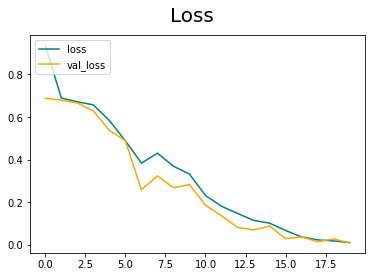

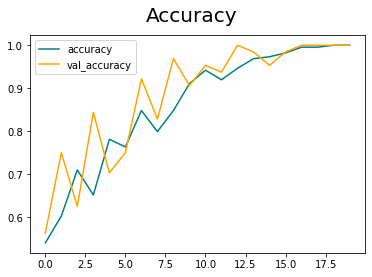

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Test**

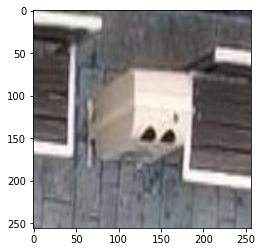

In [ ]:

img1 = cv2.imread('/content/gdrive/MyDrive/dat/smietniki/smietnik1.jpg')
resize = tf.image.resize(img1, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat
if yhat > 0.5: 
    print(f'Predicted class is Smietnik')
else:
    print(f'Predicted class is Lawka')

1/1 [==============================] - 0s 152ms/step
Predicted class is Smietnik


macierz pomyłek, dane walidacyjne z neta, sprawdzić jakimś gotowcem jako punkt odniesienia. vgg16, restnet.